<a href="https://colab.research.google.com/github/spttleonardo/NaiveBayes-application/blob/main/Trabalho_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluno:** Leonardo dos Santos Schmitt

**Descrição:** Deve-se eleborar um classificador Naive Bayes para predizer atributos especificos fornecidos pelo Dr.Prof.Mauri Ferrandi.

# Questão 1

**Problematica: Considerando o dataset e a classe indicada para cada equipe, demonstre os cálculos e qual seria a classe predita pelo Naive Bayes para os exemplos indicados.**

Para este trabalho, deve-se utilizar os atributos: age, bp, sg, al e rbc, para predizer se o exemplo pertence às classes 'ckd' (Chronic Kidney Disease) ou 'notckd' (não-Chronic Kidney Disease). Em vista disso, deve-se elaborar um classificador de Naive Bayes para determinar a qual classe os dados de teste pertencem.

Ao final desta questão, será apresentada a acurácia, assim como a matriz de confusão. Vale ressaltar que o treino do classificador será realizado a partir das probabilidades dos dados de treino do dataset, para então ser utilizado para predizer as instâncias de teste.








**PARTE 1- Criando classificador NB**

Importando módulos

In [ ]:
# Importanto módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp, pi
from sklearn.metrics import accuracy_score, confusion_matrix

Realizando implementação das funções utilizadas, tanto para calcular a proabilidade das instâncias categorias para um determinada classe, assim como, para variaveis numericas.

In [ ]:
# Funcao que verifica as instancias de cada atributo
def verifica_elementos(df,tamanho, indice):
    elementos = list()
    for i in range(len(df)):
        valor = df.values[i, indice]
        if valor not in elementos and len(elementos) < tamanho:
            elementos.append(valor)
        if len(elementos) >= tamanho:
            break
    return elementos


# Funcao que calcula a probabilidade condicional de cada atributo dado a classe em questao
def prob_cond(df,lista_atributo,lista_classe,prob_y,ncol_categ, ncol_class):
    dic = {}

    for k in range(ncol_categ-1, ncol_categ):
        for i in range(len(lista_atributo)):
            for j in range(len(lista_classe)):
                    prob_condicional = len(df.loc[(df[df.columns[k]] == lista_atributo[i]) & (df[df.columns[ncol_class]] == lista_classe[j])]) / prob_y[j]
                    dic[(df.columns[k], lista_atributo[i]), (df.columns[ncol_class], lista_classe[j])] = prob_condicional
    return dic


# Funcao para calcular a media de um vetor de valores
def mean(numbers):
    med = sum(numbers)/float(len(numbers))
    if med == 0:
        return 1
    else:
        return med


#Funcao para calcular o desvio padrao de um vetor de valores
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers])/float(len(numbers)-1)
    variance = sqrt(variance)
    if variance == 0:
        return 1
    else:
        return variance


#Funcao para calcular a probabilidade de um valor x usando a média e o desvio padrão do atributo obtidos no dataset de teste
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2/(2*stdev**2)))
    return (1/(sqrt(2*pi)*stdev))*exponent

Carregando dataset de treino direto do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Obter o link de compartilhamento do arquivo
link = "https://drive.google.com/file/d/1bAZRM24q3UCSRSGBkw3AbGxQ7H3pTZs2/view?usp=sharing"

# Extrair o ID do arquivo do link
file_id = link.split("/")[-2]

# Construir o link de download direto
download_link = f"https://drive.google.com/uc?id={file_id}"

# Carregar os dados do arquivo CSV
data_train = pd.read_csv(download_link, delimiter=',')

# Criando dataset com atributos especificos
df_train = pd.DataFrame(data_train.iloc[:, [0, 1,2,3,5, 24]])

print(df_train)

Mounted at /content/drive
      age     bp     sg  al       rbc   class
0    22.0   60.0  1.025   0    normal  notckd
1    46.0   60.0  1.010   1    normal     ckd
2    68.0   80.0  1.015   0    normal     ckd
3    74.0   60.0  1.020   0    normal  notckd
4    64.0   70.0  1.010   0    normal     ckd
..    ...    ...    ...  ..       ...     ...
295  37.0  100.0  1.010   0  abnormal     ckd
296  65.0   90.0  1.020   2  abnormal     ckd
297  65.0   70.0  1.015   4    normal     ckd
298  73.0   90.0  1.010   1  abnormal     ckd
299  43.0   80.0  1.020   0    normal  notckd

[300 rows x 6 columns]


Obtendo uma lista dos elementos de cada atributos. Neste caso pode-se apenas obter a lista de valores categoricos.

In [ ]:
# Lista categorica de rbc
lista_categ = verifica_elementos(df_train,tamanho=(df_train['rbc'].nunique()),indice=4)
print(lista_categ)

# Lista categorica de class
lista_class = verifica_elementos(df_train,tamanho=(df_train['class'].nunique()), indice=5)
print(lista_class)

['normal', 'abnormal']
['notckd', 'ckd']


Calculando o numero total de linhas, como também, calculando o somatorio de ocorrencias de elemento da classe.

In [ ]:
#Calculando o numero de linhas
nrow = len(df_train)

# Calculando o numero de ocorrencia de cada elemento da classe
prob_y = list()

for i in range(len(lista_class)):

    cal_prob = sum(df_train.values[:,5] == lista_class[i])
    prob_y.append(cal_prob)

print(prob_y)

[109, 191]


Criando um dicionario que contém as probabilidade de cada elementos categorico de rbc estar relacionado com cada elemento da classe.

In [ ]:
# Criando dicionario probabilístico
dic_categ_class = prob_cond(df_train,lista_categ,lista_class,prob_y,ncol_categ=5, ncol_class=5)
print(dic_categ_class)

{(('rbc', 'normal'), ('class', 'notckd')): 1.0, (('rbc', 'normal'), ('class', 'ckd')): 0.806282722513089, (('rbc', 'abnormal'), ('class', 'notckd')): 0.0, (('rbc', 'abnormal'), ('class', 'ckd')): 0.193717277486911}


Calculando probrabilidades relacionadas aos valores numericos.

In [ ]:
# Calculando a probabilidade de ckd para age
age_meanCkd = mean(df_train.loc[(df_train['class'] == 'ckd')].values[:,0])
age_stdevCkd = stdev(df_train.loc[(df_train['class'] == 'ckd')].values[:,0])

# Calculando a probabilidade de notckd para age
age_meanNotCkd = mean(df_train.loc[(df_train['class'] == 'notckd')].values[:,0])
age_stdevNotCkd  = stdev(df_train.loc[(df_train['class'] == 'notckd')].values[:,0])

In [ ]:
# Calculando a probabilidade de ckd para sg
bp_meanCkd = mean(df_train.loc[(df_train['class'] == 'ckd')].values[:,1])
bp_stdevCkd = stdev(df_train.loc[(df_train['class'] == 'ckd')].values[:,1])

# Calculando a probabilidade de notckd para al
bp_meanNotCkd = mean(df_train.loc[(df_train['class'] == 'notckd')].values[:,1])
bp_stdevNotCkd  = stdev(df_train.loc[(df_train['class'] == 'notckd')].values[:,1])


In [ ]:
# Calculando a probabilidade de ckd parasg
sg_meanCkd = mean(df_train.loc[(df_train['class'] == 'ckd')].values[:,2])
sg_stdevCkd = stdev(df_train.loc[(df_train['class'] == 'ckd')].values[:,2])

# Calculando a probabilidade de notckd para bp
sg_meanNotCkd = mean(df_train.loc[(df_train['class'] == 'notckd')].values[:,2])
sg_stdevNotCkd  = stdev(df_train.loc[(df_train['class'] == 'notckd')].values[:,2])


In [ ]:
# Calculando a probabilidade de ckd parasg
al_meanCkd = mean(df_train.loc[(df_train['class'] == 'ckd')].values[:,3])
al_stdevCkd = stdev(df_train.loc[(df_train['class'] == 'ckd')].values[:,3])


# Calculando a probabilidade de notckd para bp
al_meanNotCkd = mean(df_train.loc[(df_train['class'] == 'notckd')].values[:,3])
al_stdevNotCkd  = stdev(df_train.loc[(df_train['class'] == 'notckd')].values[:,3])

**Parte 2- utilizando dados de teste para validar modelo de classificador de NB.**

Carregando dataset de treino direto do drive

In [ ]:
# Link de compartilhamento do arquivo
link = "https://drive.google.com/file/d/1wPhoV8-TQ7Cpxuw7iScD6Ud8qJ7COusG/view?usp=sharing"

# Extrair o ID do arquivo do link
file_id = link.split("/")[-2]

# Construir o link de download direto
download_link = f"https://drive.google.com/uc?id={file_id}"

# Carregar os dados do arquivo CSV
data_test = pd.read_csv(download_link)

# Create a new DataFrame using the first two rows
df_test = pd.DataFrame(data_test.iloc[:, [0, 1,2,3,5, 24]])

print(df_test)

     age    bp     sg  al     rbc   class
0   33.0  80.0  1.025   0  normal  notckd
1   73.0  60.0  1.020   0  normal  notckd
2   30.0  80.0  1.020   0  normal  notckd
3   55.0  80.0  1.020   0  normal  notckd
4   50.0  90.0  1.020   0  normal     ckd
..   ...   ...    ...  ..     ...     ...
95  34.0  70.0  1.020   0  normal     ckd
96  42.0  70.0  1.020   0  normal  notckd
97  66.0  70.0  1.015   2  normal     ckd
98  65.0  70.0  1.010   0  normal     ckd
99  67.0  80.0  1.025   0  normal  notckd

[100 rows x 6 columns]


Criando seção para calcular as probabilidades relacionadas a cada elemento de cada linha e coluna com cada elemento da classe no dados de teste.

In [ ]:
vetor_aux  = []
vetor_final = []

for i in range(len(df_test)):
    linha = []  # Inicializa uma nova linha para a matriz

    for k in range(len(lista_class)):

        for j in range(len(df_test.iloc[1])-1):
            num = df_test.values[i, j]
            # Condicional if se num for inteiro ou float
            if isinstance(num, int) or isinstance(num, float):  # Verifica se num é do tipo int

                # Condicional para verificar se a coluna em questão e age
                if df_test.columns[j] == 'age' :
                    if(lista_class[k] == 'ckd'):
                        valor = calculate_probability(num, age_meanCkd, age_stdevCkd)
                        linha.append(valor)
                    else:
                        valor = calculate_probability(num, age_meanNotCkd, age_stdevNotCkd)
                        linha.append(valor)
                # Condicional para verificar se a coluna em questão e bp
                if df_test.columns[j] == 'bp' :
                    if(lista_class[k] == 'ckd'):
                        valor = calculate_probability(num, bp_meanCkd, bp_stdevCkd)
                        linha.append(valor)
                    else:
                        valor = calculate_probability(num, bp_meanNotCkd, bp_stdevNotCkd)
                        linha.append(valor)
                 # Condicional para verificar se a coluna em questão e sg
                if df_test.columns[j] == 'sg' :
                    if(lista_class[k] == 'ckd'):
                        valor = calculate_probability(num, sg_meanCkd, sg_stdevCkd)
                        linha.append(valor)
                    else:
                        valor = calculate_probability(num, sg_meanNotCkd, sg_stdevNotCkd)
                        linha.append(valor)
                 # Condicional para verificar se a coluna em questão e al
                if df_test.columns[j] == 'al' :
                    if(lista_class[k] == 'ckd'):
                        valor = calculate_probability(num, al_meanCkd, al_stdevCkd)
                        linha.append(valor)
                    else:
                        valor = calculate_probability(num, al_meanNotCkd, al_stdevNotCkd)
                        linha.append(valor)
            else: # Condicional else para verificar se num encontra-se em dic_categ_class
                n = ((df_test.columns[j], num), (df_test.columns[5], lista_class[k]))

                if n in dic_categ_class:
                    valor = dic_categ_class[n]
                else:
                    valor =  0
                linha.append(valor)  # Adiciona o valor à linha atual

        if len(linha) == (len(df_test.iloc[1])-1):
            vetor_aux.append(linha)  # Adiciona a linha à matriz
            linha = []
    if len(vetor_aux) == len(lista_class):
        vetor_final.append(vetor_aux)
        vetor_aux = []

print(vetor_final)
print(len(vetor_final))

Criando seção para realizar a predição dos dados de teste

In [ ]:
resposta = []
val_one = 1

for i in range(len(vetor_final)):
    for k in range(len(lista_class)):
        val_two = val_one
        val_one = 1

        for j in range(len(vetor_final[0][0])):
            y = vetor_final[i][k][j]
            val_one = val_one * y

        val_one = ((prob_y[k])/nrow)*val_one

    if val_one < val_two:
        resposta.append(lista_class[len(lista_class) - 2])  # Classifica com notcdk
    else:
        resposta.append(lista_class[len(lista_class)-1])  # Classifica com cdk

print(resposta)
print(len(resposta))

Seção para calcular a acurácia e matriz de confusão

In [ ]:
resultado_esperado = df_test.values[:, 5]

# Calcular a acurácia
acuracia = accuracy_score(resultado_esperado, resposta)
print("Acurácia:", acuracia)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(resultado_esperado, resposta)
print("Matriz de Confusão:")
print(matriz_confusao)

Acurácia: 0.89
Matriz de Confusão:
[[48 11]
 [ 0 41]]


Por fim pode-se concluir através da acurácia e da matriz de confusão, que o classificador foi implementado com sucesso.

# Questão 2

**Poblematica: Executar o mesmo dataset com
o Weka usando os algoritmos Naive Bayes e J48 e
comparar os resultados obtido no modelo da quest
ão 1. Colocar os resultados obtidos
no Weka no colab de entrega da questão 1**

Executando classificador Naive Bayes no Weka, temos que:

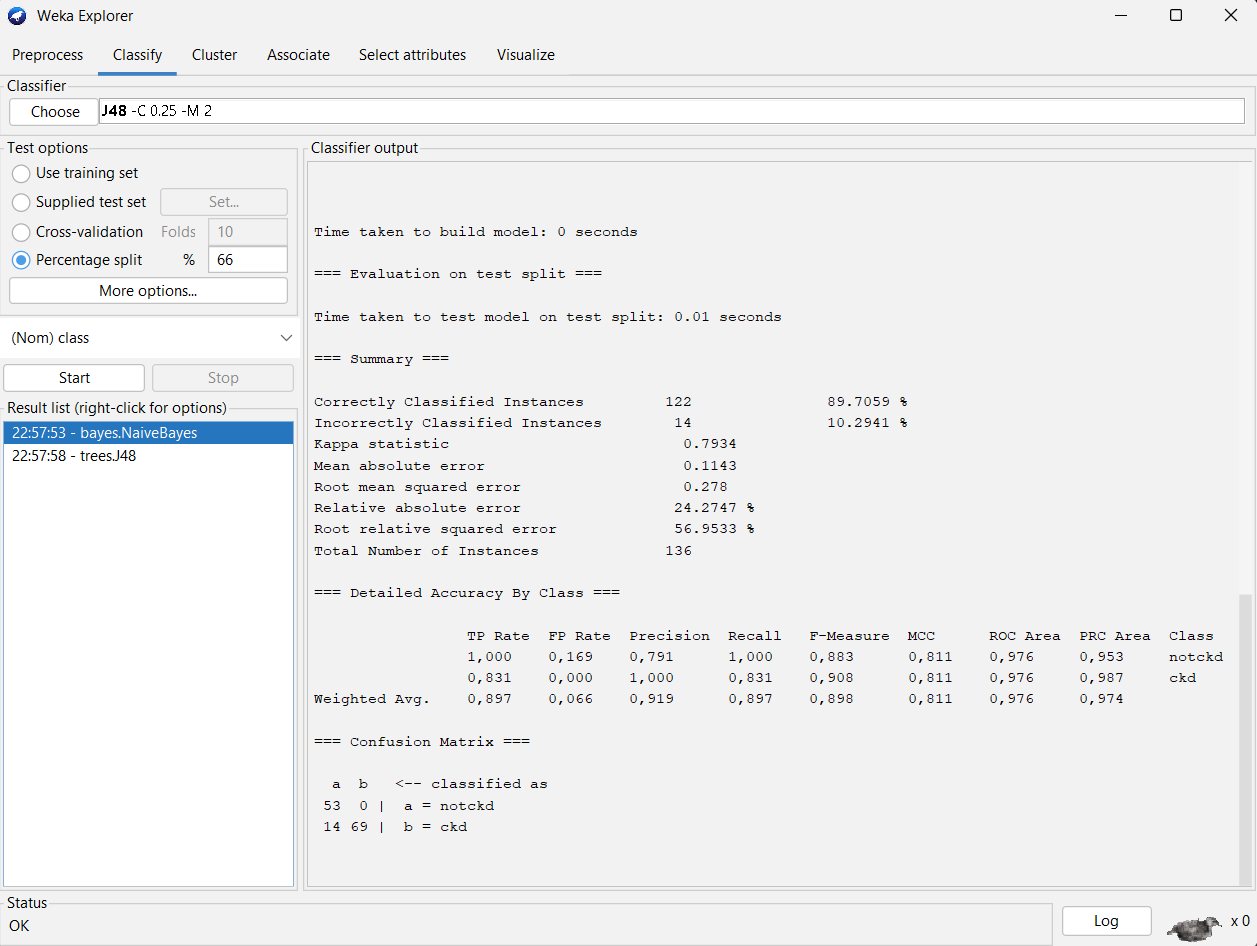

Executando classificador J48 no weka, temos que:

Importando módulos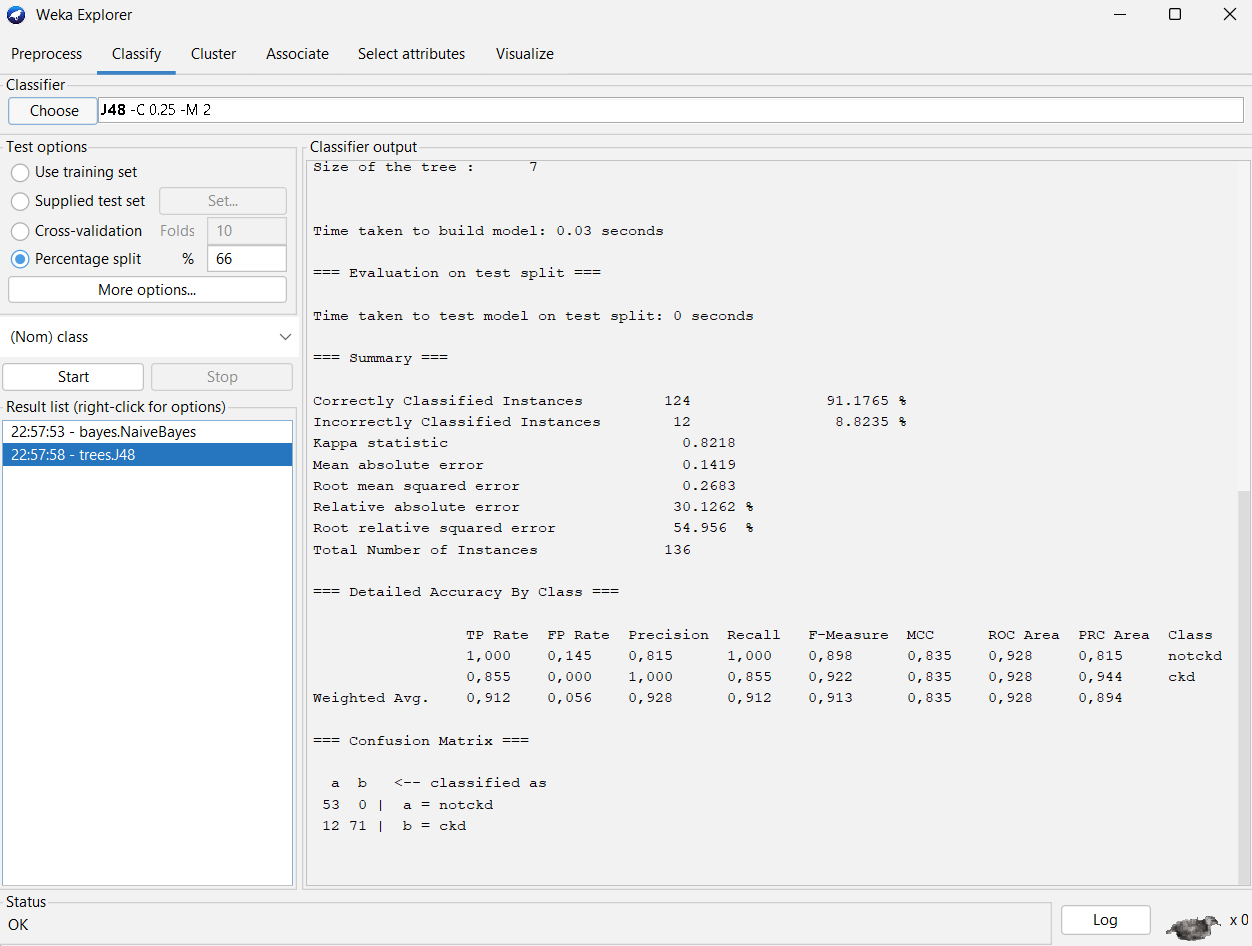

Portanto, pode-se concluir que quando executados os classificadores através do Weka, o J48 se sobressai em relação ao Naive Bayes. Já quando comparados os resultados obtidos no Weka, em relação ao classificador obtido na questão 1, todos acabam se sobressaindo. Entretanto, ressalta-se que o classificador Naive Bayes da questão tende a se aproximar do resultado do Naive Bayes do Weka.